# 결정 트리 실습 -> 유방암

In [1]:
# 모듈 로딩
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# numpy -> DataFrame 형태로 데이터 로딩
datax,datay = load_breast_cancer(return_X_y=True, as_frame=True)

In [3]:
print(datax.head())
print(datax.info())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

In [4]:
datax.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [5]:
# .values, .to_numpy() -> DataFrame -> numpy
# DataFrame을 써도 되지만 warning이 뜰 수 있기 때문에 numpy로 바꿔쓴다.
datax.values

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [6]:
# train : test = 75 : 25
# stratify : 라벨 즉 타겟 데이터 지정 : 학습&테스트 데이터에도 비율 맞추기
train_x, test_x, train_y, test_y = train_test_split(datax.values, datay.values,random_state=42, stratify = datay)

In [7]:
print(train_x.shape, test_x.shape)

(426, 30) (143, 30)


### 학습
- DecisionTreeClassfier ()

In [8]:
dt = DecisionTreeClassifier()
dt.fit(train_x, train_y)

DecisionTreeClassifier()

In [9]:
print(dt.score(train_x, train_y))
print(dt.score(test_x, test_y))   # overfitting

1.0
0.9090909090909091


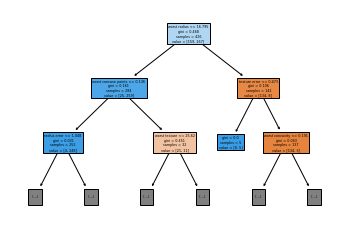

<Figure size 1440x1080 with 0 Axes>

In [10]:
plot_tree(dt, filled=True, max_depth=2 , feature_names=datax.columns)
plt.figure(figsize=(20,15))
plt.savefig('tree.png')
plt.show()

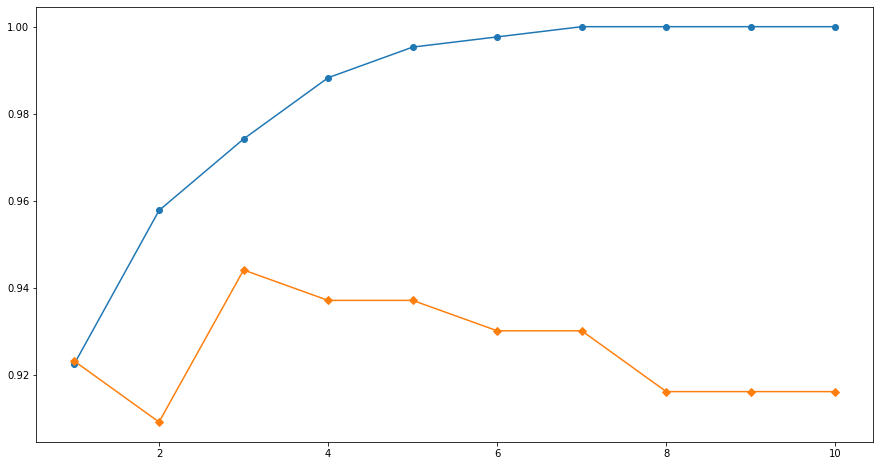

In [11]:
def dt_make(num):
    dt = DecisionTreeClassifier(max_depth=num)
    dt.fit(train_x, train_y)
    return dt
training = [dt_make(i).score(train_x, train_y) for i in range(1,11)]
testing = [dt_make(i).score(test_x, test_y) for i in range(1,11)]
plt.figure(figsize=(15,8))
plt.plot(range(1,11), training, marker='o')
plt.plot(range(1,11), testing, marker='D')
plt.show()

In [12]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)
dt.fit(train_x, train_y)
print(dt.score(train_x, train_y))
print(dt.score(test_x, test_y))

0.9976525821596244
0.9370629370629371


In [13]:
# 베스트 추론 train:0.988, test:0.944
dt = DecisionTreeClassifier(max_depth = 4, random_state=42)
dt.fit(train_x, train_y)
print(dt.score(train_x, train_y))
print(dt.score(test_x, test_y))
print(dt.feature_importances_)
print(dt.feature_importances_.argmax())
print(f'{datax.columns[20]}  : {dt.feature_importances_[20]}')

0.9882629107981221
0.9440559440559441
[0.         0.01258462 0.         0.         0.         0.
 0.         0.0141577  0.         0.         0.         0.04839825
 0.         0.01261296 0.         0.         0.         0.
 0.         0.         0.72682851 0.03323127 0.         0.
 0.         0.         0.018188   0.1221132  0.01188548 0.        ]
20
worst radius  : 0.7268285094603201
